In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

victor = pd.read_excel('gamelogs.xlsx')

victor['DATE'] = pd.to_datetime(victor['DATE'])
victor['MonthYear'] = victor['DATE'].dt.to_period('M')
victor['MonthYear'] = victor['MonthYear'].dt.strftime('%Y/%m')

victor['FGM'] = victor['2PM'] + victor['3PM']
victor['FGA'] = victor['2PA'] + victor['3PA']
victor['FG%'] = round((victor['FGM'] / victor['FGA']) * 100, 1)

victor['2P%'] = round((victor['2PM'] / victor['2PA']) * 100, 1)
victor['3P%'] = round((victor['3PM'] / victor['3PA']) * 100, 1)
victor['FT%'] = round((victor['FTM'] / victor['FTA']) * 100, 1)

victor['eFG%'] = round(((victor['2PM'] + 0.5 * victor['3PM']) / (victor['2PA'] + victor['3PA'])) * 100, 1)

# Reorder columns
victor = victor[['GAME #', 'SEASON', 'TYPE', 'HOME/AWAY', 'RESULT', 'TEAM', 'PTS_FOR', 'PTS_AGN', 'OPPONENT',
                 'DATE', 'MonthYear', 'PTS', 'REB', 'AST', 'MIN', 'FGM', 'FGA', 'FG%', 'eFG%',
                 '2PM', '2PA', '2P%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'STL', 'TO', 'BLK', 'EFF']]

victor['GmSc'] = (victor['PTS'] + 0.4 * victor['FGM'] - 0.7 * victor['FGA'] - 0.4 * (victor['FTA'] - victor['FTM']) +
                  0.7 * victor['OR'] + 0.3 * victor['DR'] + victor['STL'] + 0.7 * victor['AST'] +
                  0.7 * victor['BLK'] - victor['TO'])

# Initial outline

1. Data Collection:
Gather data related to Victor Wembanyama's basketball career. This could include game statistics, team information, and any relevant details. Sources might include official NBA databases, sports analytics platforms, or reputable sports websites.
2. Import Libraries:
In your Python notebook, start by importing essential libraries for data analysis such as Pandas, NumPy, and Matplotlib/Seaborn for visualization.
3. Load and Explore Data:
Load your dataset into a Pandas DataFrame. Use head(), info(), and describe() functions to get an initial overview of the data.
4. Data Cleaning:
Check for missing values, duplicate entries, and outliers. Handle these issues appropriately based on your analysis goals.
5. Feature Engineering:
Create new features if needed. For basketball, you might calculate averages, shooting percentages, or other relevant metrics.
6. Visual Exploration:
Create visualizations to explore trends and patterns. Consider using line plots, bar charts, and heatmaps to represent different aspects of Wembanyama's performance over time.
7. Statistical Analysis:
Use statistical methods to identify significant trends or changes in his performance. Consider calculating mean, median, and standard deviation for key metrics.
8. Game-by-Game Analysis:
If you have data for each game, analyze the variability in his performance. Visualize how specific statistics change from one game to another.
9. Team Impact:
Explore the impact Wembanyama has on his team. Analyze team performance with and without him on the court.
10. Interactive Widgets (Optional):
Consider using interactive widgets (e.g., with ipywidgets library) to allow for dynamic exploration of the data.
11. Documentation:
Clearly document your code and analysis steps. Explain your findings in Markdown cells for better readability.
12. Share and Iterate:
Share your insights with others, and don't hesitate to iterate on your analysis based on feedback or new data.

# Exploring the Data

## Overview of the data

In [3]:
victor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   GAME #     159 non-null    int64         
 1   SEASON     159 non-null    object        
 2   TYPE       159 non-null    object        
 3   HOME/AWAY  159 non-null    object        
 4   RESULT     159 non-null    object        
 5   TEAM       159 non-null    object        
 6   PTS_FOR    159 non-null    int64         
 7   PTS_AGN    159 non-null    int64         
 8   OPPONENT   159 non-null    object        
 9   DATE       159 non-null    datetime64[ns]
 10  PTS        159 non-null    int64         
 11  REB        159 non-null    int64         
 12  AST        159 non-null    int64         
 13  MIN        159 non-null    int64         
 14  FGM        159 non-null    int64         
 15  FGA        159 non-null    int64         
 16  FG%        153 non-null    float64       
 1

## Missing values

In [4]:
victor.isnull().sum()

GAME #        0
SEASON        0
TYPE          0
HOME/AWAY     0
RESULT        0
TEAM          0
PTS_FOR       0
PTS_AGN       0
OPPONENT      0
DATE          0
PTS           0
REB           0
AST           0
MIN           0
FGM           0
FGA           0
FG%           6
eFG%          6
2PM           0
2PA           0
2P%           8
3PM           0
3PA           0
3P%          15
FTM           0
FTA           0
FT%          48
OR            0
DR            0
STL           0
TO            0
BLK           0
EFF           0
GmSc          0
dtype: int64

## Descriptive statistics

In [5]:
victor.describe()

,GAME #,PTS_FOR,PTS_AGN,PTS,REB,AST,MIN,FGM,FGA,FG%,...,FTM,FTA,FT%,OR,DR,STL,TO,BLK,EFF,GmSc
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,153.000000,...,159.000000,159.000000,111.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,80.000000,82.522013,79.949686,13.433962,7.169811,1.402516,23.735849,4.937107,10.823899,44.081046,...,2.591195,3.333333,74.997297,1.710692,5.459119,0.761006,2.075472,2.786164,16.849057,11.988050
std,46.043458,15.418974,17.118647,8.726889,4.220516,1.423667,9.255483,3.155637,5.823930,16.689599,...,3.065145,3.691706,25.286649,1.580522,3.582203,1.009193,1.655628,1.975690,10.760446,8.148164
min,1.000000,52.000000,38.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-2.800000
25%,40.500000,70.000000,69.000000,7.000000,4.000000,0.000000,18.000000,3.000000,7.000000,33.300000,...,0.000000,0.000000,53.550000,1.000000,3.000000,0.000000,1.000000,1.000000,9.000000,5.950000
50%,80.000000,82.000000,79.000000,12.000000,7.000000,1.000000,25.000000,4.000000,10.000000,44.400000,...,2.000000,2.000000,80.000000,1.000000,5.000000,1.000000,2.000000,3.000000,17.000000,11.300000
75%,119.500000,92.000000,87.000000,19.000000,10.000000,2.000000,32.000000,7.000000,16.000000,55.000000,...,4.000000,5.500000,100.000000,2.500000,8.000000,1.000000,3.000000,4.000000,24.000000,17.400000
max,159.000000,132.000000,152.000000,38.000000,21.000000,6.000000,40.000000,15.000000,28.000000,85.700000,...,13.000000,16.000000,100.000000,9.000000,14.000000,6.000000,7.000000,9.000000,41.000000,31.900000


# Career visualization

## Points

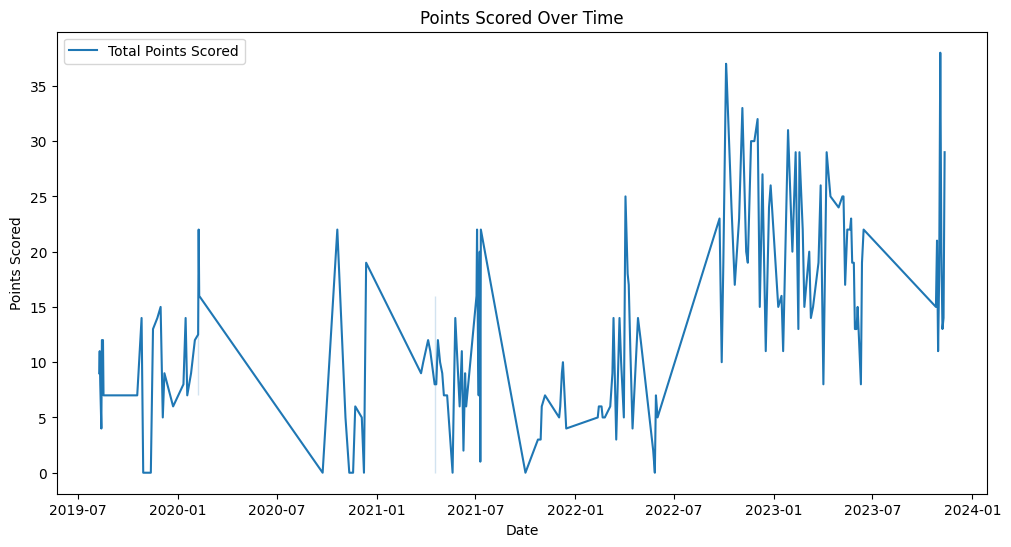

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='PTS', data=victor, label='Total Points Scored')
plt.title('Points Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Points Scored')
plt.legend()
plt.show()

## Shooting efficiency

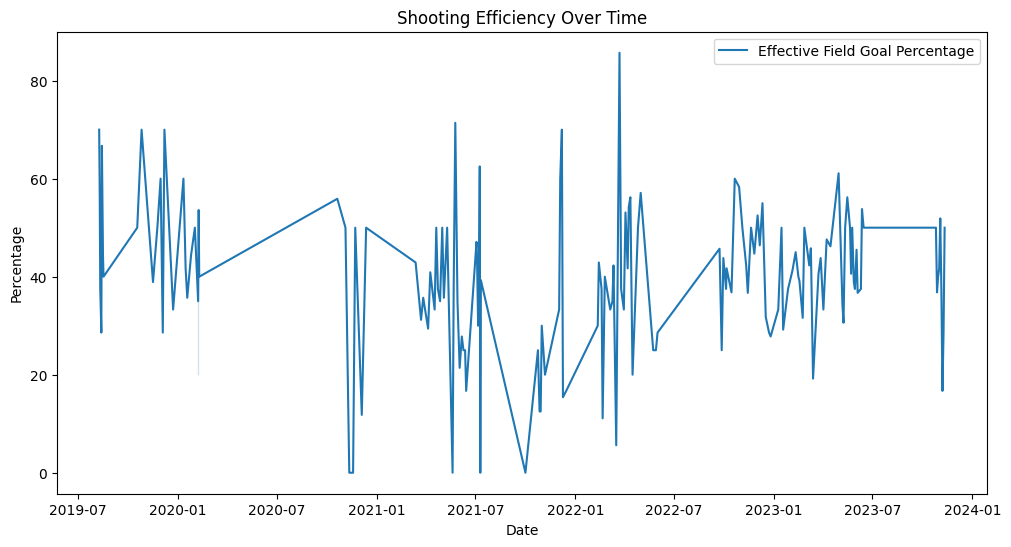

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='eFG%', data=victor, label='Effective Field Goal Percentage')
plt.title('Shooting Efficiency Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Dashboard

In [12]:
# Import necessary libraries
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import webbrowser

# Load your data (replace 'your_data.csv' with your actual file path)
df = victor

# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div(children=[
    html.H1(children='Victor Wembanyama Career Dashboard'),

    # Page 1: Overview
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(
                id='total-points-line-chart',
                figure=px.line(df, x='MonthYear', y='PTS', title='Points Scored Over Time')
            ),
        ], className='six columns'),

        html.Div(children=[
            dcc.Graph(
                id='total-rebounds-line-chart',
                figure=px.line(df, x='MonthYear', y='REB', title='Rebounds Over Time')
            ),
        ], className='six columns'),
    ], className='row'),

    # Add more sections for other statistics if needed

])

webbrowser.open_new_tab('http://127.0.0.1:8050/')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
